# **Clustring Project**

## libraries

In [ ]:
## Main Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

## processing

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.neighbors import NearestNeighbors

## Clustering
from sklearn.cluster import KMeans,DBSCAN

## metrics
from sklearn.metrics import silhouette_score , silhouette_samples
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [ ]:
!pip install streamlit
!npm install localtunnel

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00
⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
added 22 packages in 3s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦

In [ ]:
from google.colab import files
df = files.upload()

Saving CC GENERAL.csv to CC GENERAL.csv


In [ ]:
df = pd.read_csv('CC GENERAL.csv')

In [ ]:
df.shape

(8950, 18)

## 🧪 EDA - Exploratory Data Analysis

In [ ]:
# 1. Display the first few rows
print(df.head())


  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [ ]:
# 2. General information about columns and data types
print("=== Data Info ===")
print(df.info())


=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   i

In [ ]:
# 3. Descriptive statistics
print("=== Descriptive Statistics ===")
print(df.describe())



=== Descriptive Statistics ===
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000 

In [ ]:
# 4. Count of missing values per column
print("=== Missing Values (Counts) ===")
print(df.isna().sum())

=== Missing Values (Counts) ===
CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [ ]:
# 5. Percentage of missing values per column
print("=== Missing Values (%) ===")
missing_values = df.isna().mean() * 100
print(missing_values)


=== Missing Values (%) ===
CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64


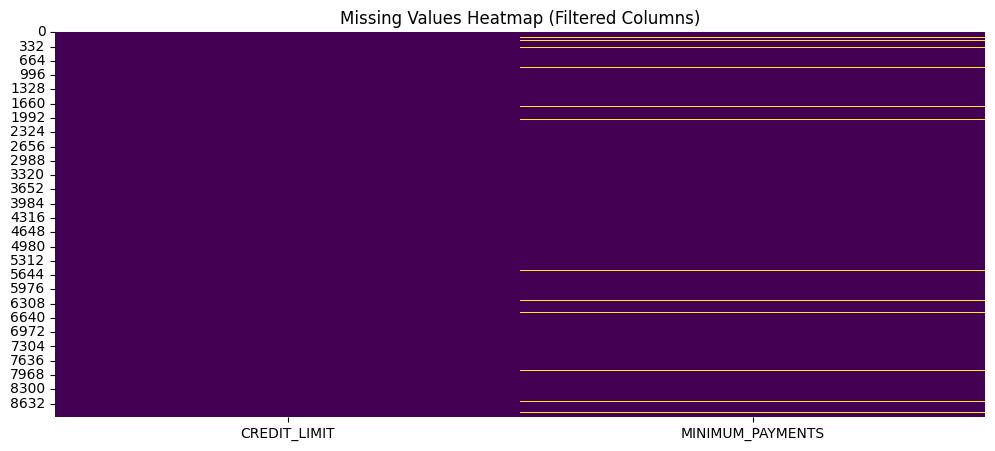

In [ ]:
# 6. Heatmap of missing values
# Filter columns that actually have missing values
missing_cols = df.columns[df.isna().any()]

# Only plot the columns with missing values
plt.figure(figsize=(12, 5))
sns.heatmap(df[missing_cols].isna(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (Filtered Columns)')
plt.show()

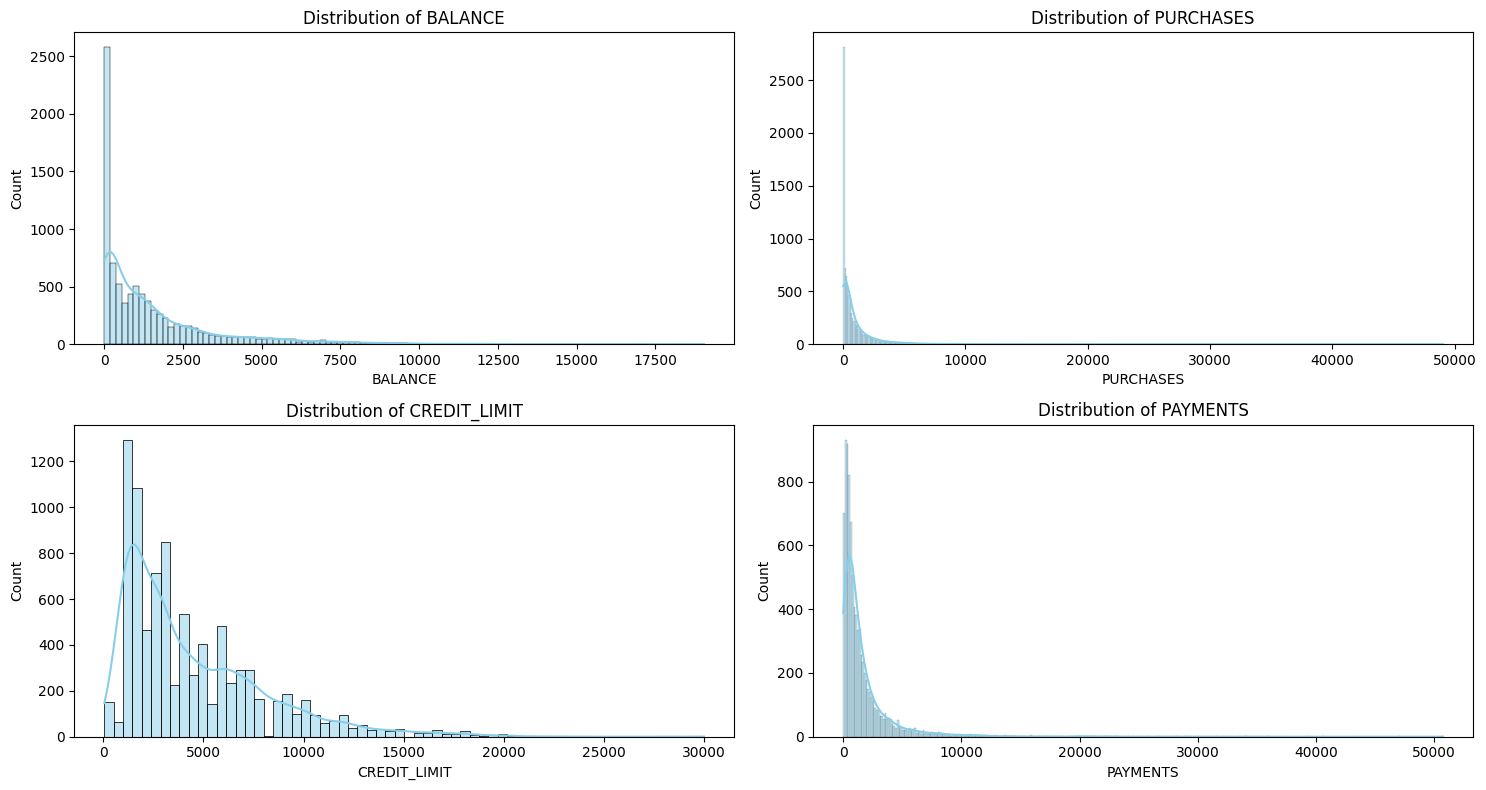

In [ ]:
# 7. Distributions of important features
important_cols = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']
plt.figure(figsize=(15, 8))
for i, col in enumerate(important_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


-

-

-

In [ ]:
df=df.drop(['CUST_ID'],axis=1)

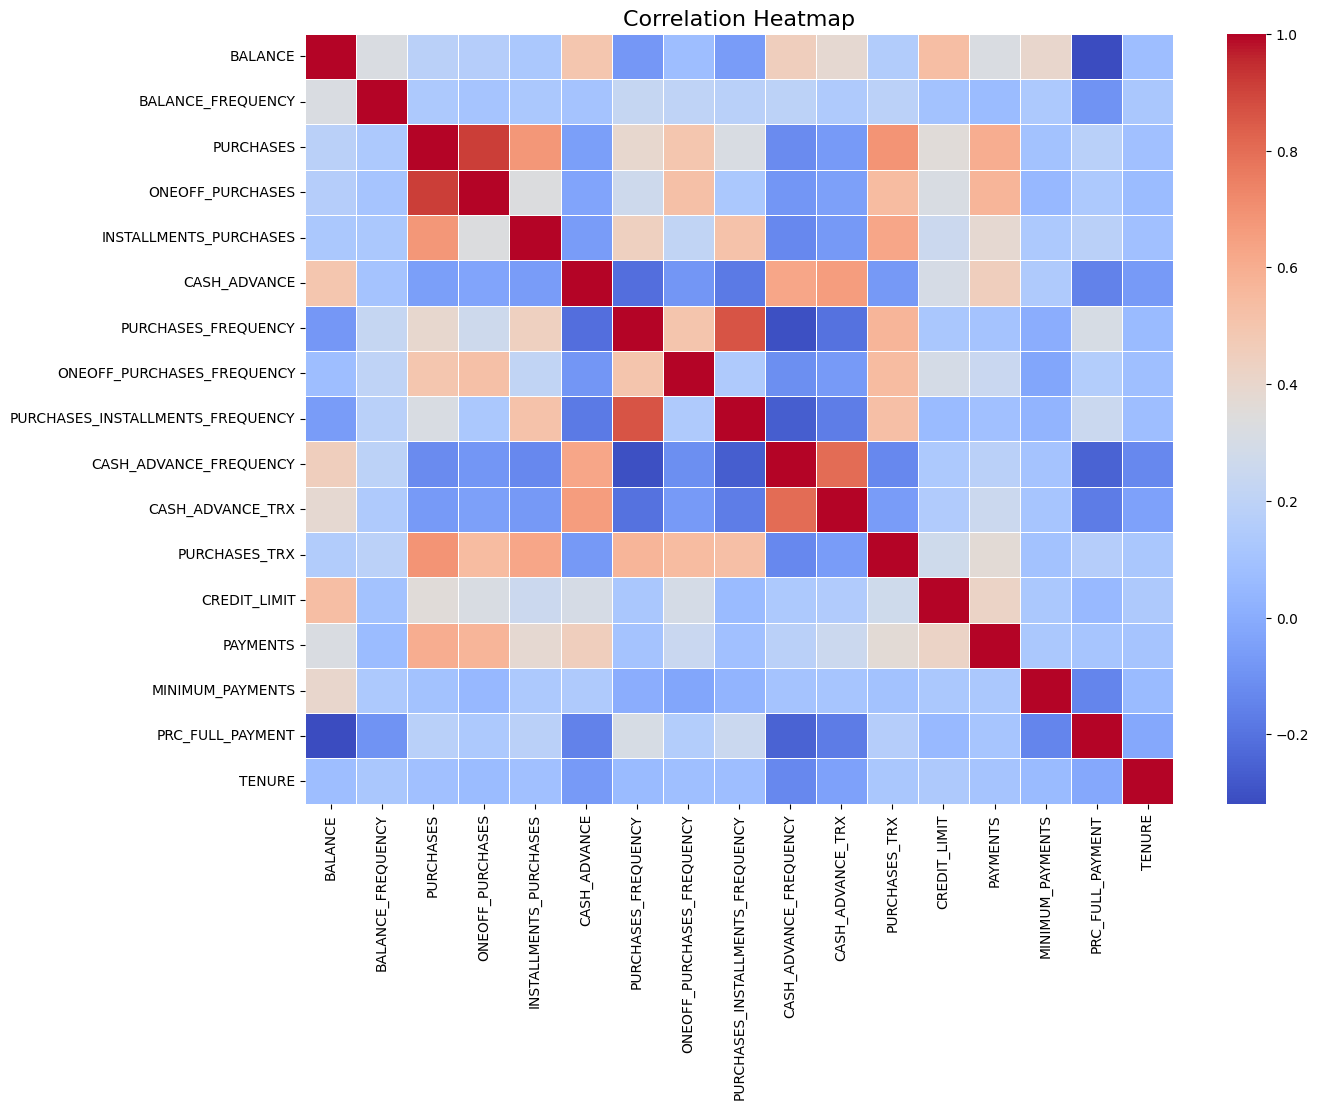

In [ ]:
# 8. Correlation matrix heatmap To Calculate Pearson correlation
plt.figure(figsize=(14, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


## processing

In [ ]:
## impute NaN Values With Mean

impute=SimpleImputer(strategy="mean")
df=pd.DataFrame(impute.fit_transform(df),columns=df.columns)

In [ ]:
df.isna().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [ ]:
## Scaling The Feature

standerscaler=StandardScaler()
df.iloc[:,:]=standerscaler.fit_transform(df.iloc[:,:])

In [ ]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


## PCA – Principal Component **BONUS**:😎


In [ ]:
pca=PCA(n_components=2) ## reduce Dimentionality to 2 features
pca_df=pca.fit_transform(df)
print(f"Explained Variance: {sum(pca.explained_variance_ratio_)}")

Explained Variance: 0.4759202855062018


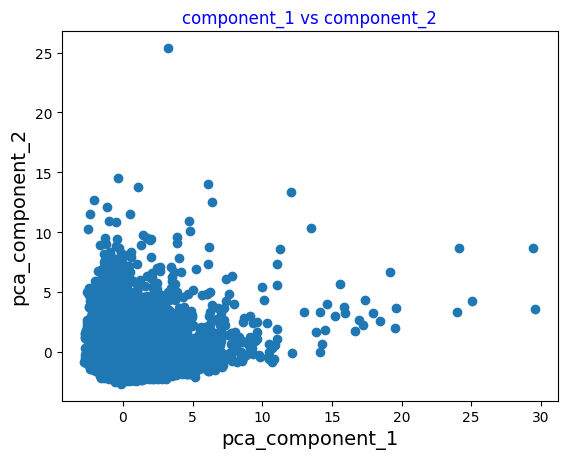

In [ ]:
## figure pca component

plt.scatter(x=pca_df[:,0],y=pca_df[:,1])

plt.xlabel("pca_component_1",fontsize=14)
plt.ylabel("pca_component_2",fontsize=14)
plt.title("component_1 vs component_2",color='b')

plt.show()


# K-Means

In [ ]:
## select best number of k using elbow method

k_choose=np.arange(1,11)
k_best={}
for i in k_choose:
    model=KMeans(n_clusters=i,n_init=10)
    model.fit(pca_df)
    inertia=model.inertia_
    k_best[i]=inertia

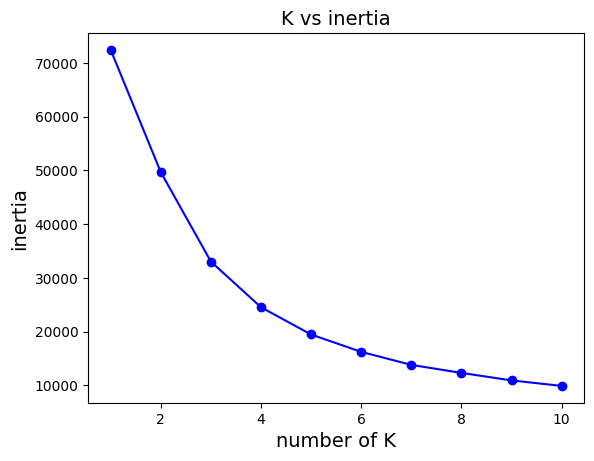

In [ ]:
## plot Elbow method

plt.plot(k_best.keys(),k_best.values(),'bo-')

plt.title('K vs inertia',fontsize=14)
plt.xlabel('number of K',fontsize=14)
plt.ylabel('inertia',fontsize=14)

plt.show()

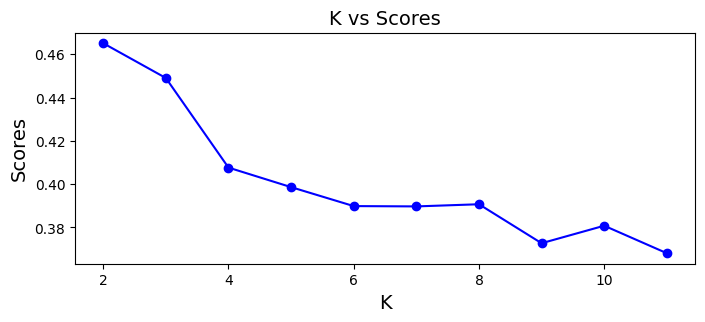

In [ ]:
## select best number of k using silhouette_score

sil_scores=[]

for k in np.arange(2,12,1):
    kmeans=KMeans(n_clusters=k,random_state=42)
    labels=kmeans.fit_predict(pca_df)
    scores=silhouette_score(pca_df,labels)
    sil_scores.append(scores)

plt.figure(figsize=(8,3))
plt.plot(np.arange(2,12),sil_scores,'bo-')
plt.title("K vs Scores",fontsize=14,c='k')
plt.xlabel("K",fontsize=14,c='k')
plt.ylabel("Scores",fontsize=14,c='k')
plt.show()

In [ ]:
## build model k-mean
best_k=2
kmeans=KMeans(n_clusters=best_k,n_init=10)
kmeans.fit(pca_df)

KMeans(n_clusters=2, n_init=10)

In [ ]:
y_pred=kmeans.predict(pca_df)
np.unique(y_pred)

array([0, 1], dtype=int32)

In [ ]:
## centroid

kmeans.cluster_centers_

array([[ 3.4895175 ,  0.08915629],
       [-0.72806273, -0.01860182]])

In [ ]:
new_df=pd.DataFrame({'component_1':pca_df[:,0],"component_2":pca_df[:,1],"label":y_pred})
new_df.head()

,component_1,component_2,label
0,-1.682220,-1.076451,1
1,-1.138295,2.506477,1
2,0.969684,-0.383520,1
3,-0.873628,0.043166,1
4,-1.599434,-0.688581,1


## plot k-means

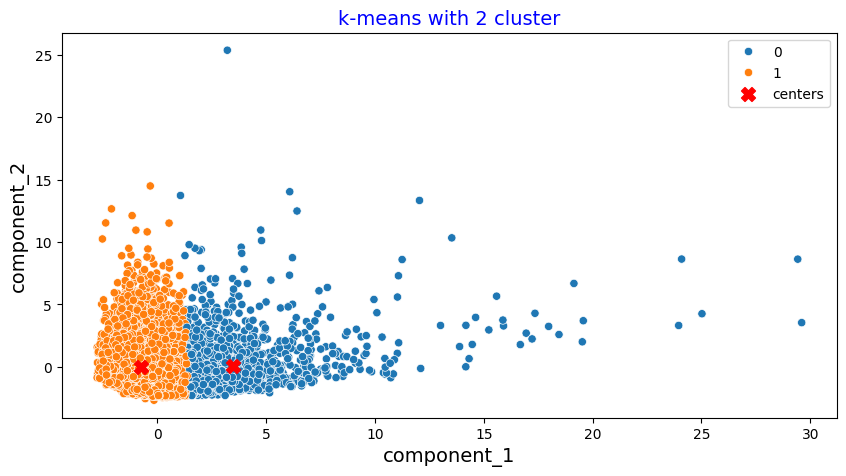

In [ ]:
## plot figure for k-means

plt.figure(figsize=(10,5))

sns.scatterplot(x=new_df['component_1'],y=new_df['component_2'],hue=new_df['label'])
plt.scatter(np.squeeze(kmeans.cluster_centers_[:,0]),np.squeeze(kmeans.cluster_centers_[:,1]),s=100,c='red',marker='X',label='centers')

plt.title('k-means with 2 cluster',fontsize=14,color='b')
plt.xlabel("component_1",fontsize=14,c='k')
plt.ylabel("component_2",fontsize=14,c='k')

plt.legend()
plt.show()

# DBSCAN

In [ ]:
## build model dbscan

dbscan=DBSCAN(eps=0.6,min_samples=5)
predict=dbscan.fit_predict(pca_df)

In [ ]:
## number of clusters

np.unique(dbscan.labels_)  # -1 ----> outliers

array([-1,  0,  1])

## plot DBSCAN


In [ ]:
new_df_2=pd.DataFrame({'component_1':pca_df[:,0],"component_2":pca_df[:,1],"label":predict})
new_df_2.head()

,component_1,component_2,label
0,-1.682220,-1.076451,0
1,-1.138295,2.506477,0
2,0.969684,-0.383520,0
3,-0.873628,0.043166,0
4,-1.599434,-0.688581,0


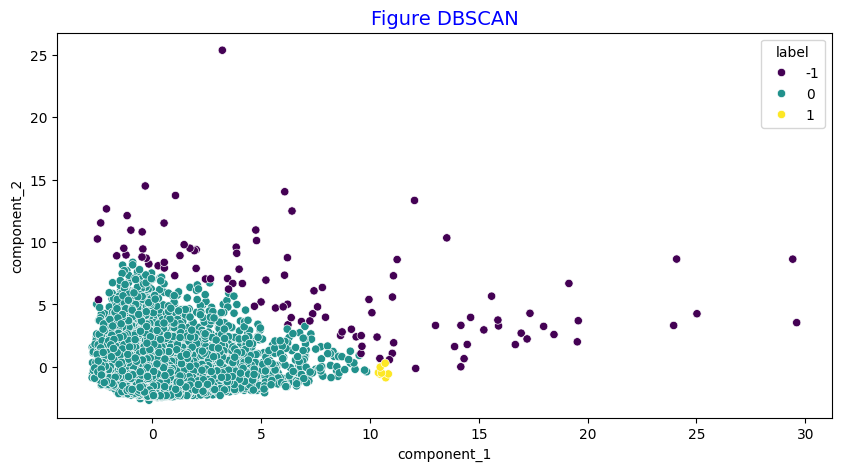

In [ ]:
## plot dbscan

plt.figure(figsize=(10,5))

sns.scatterplot(x=new_df_2['component_1'],y=new_df_2['component_2'],hue=new_df_2['label'],palette='viridis')

plt.title("Figure DBSCAN",fontsize=14,color='b')
plt.show()

#visualizations

In [ ]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Scale the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

# Apply PCA for 2D visualization
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust n_clusters as needed
kmeans_labels = kmeans.fit_predict(df_scaled)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(df_scaled)

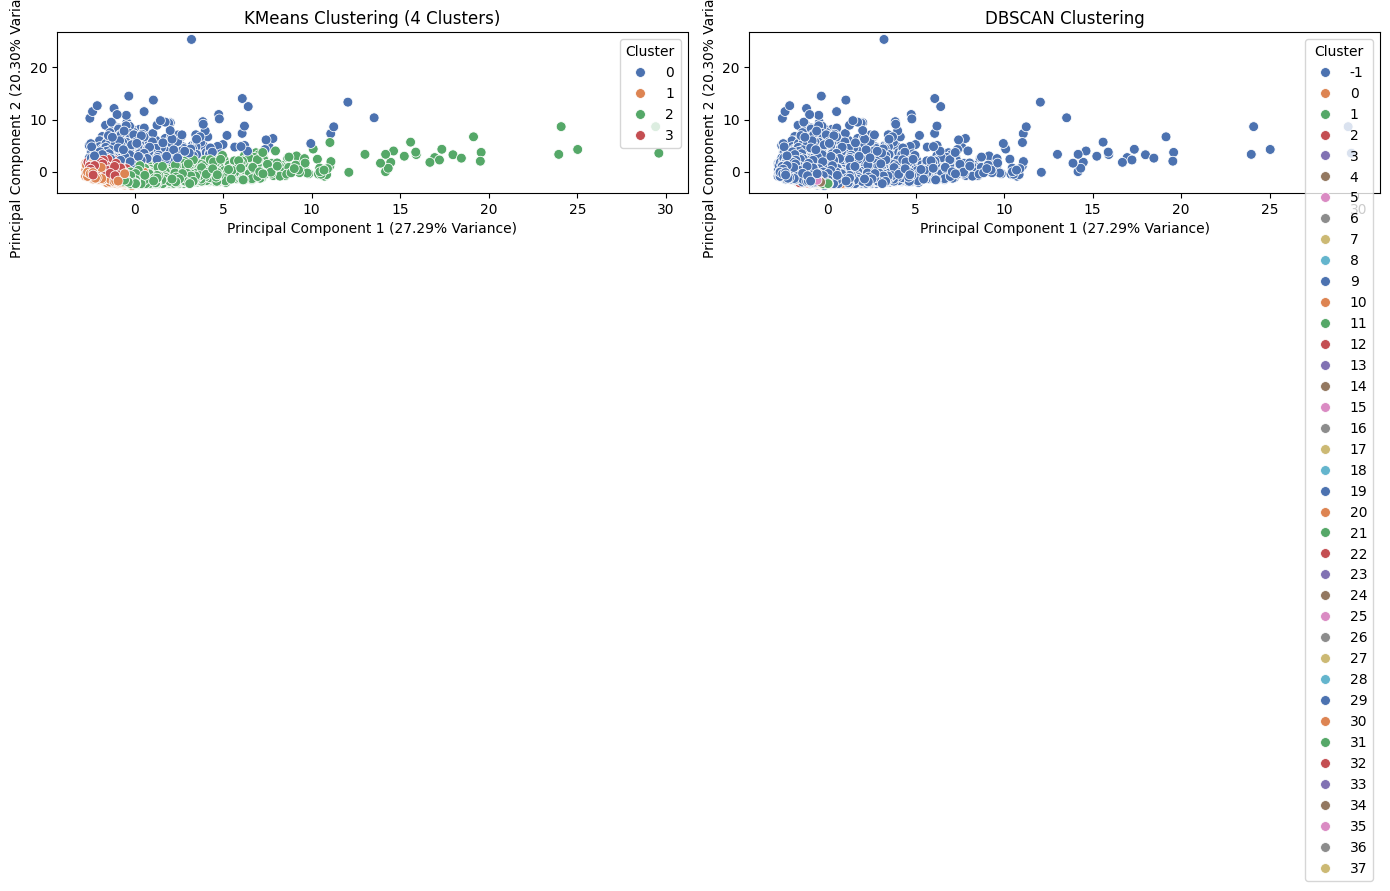

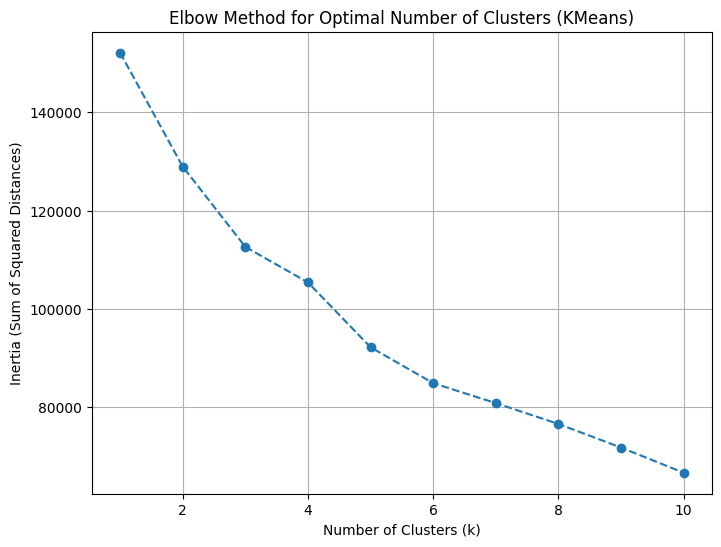

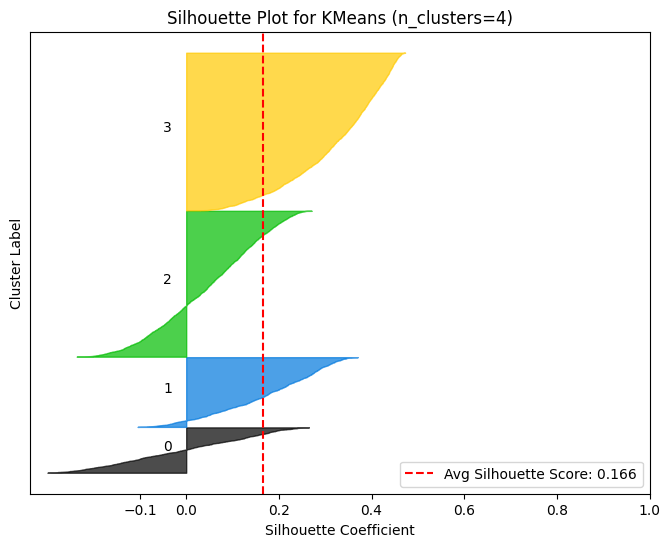

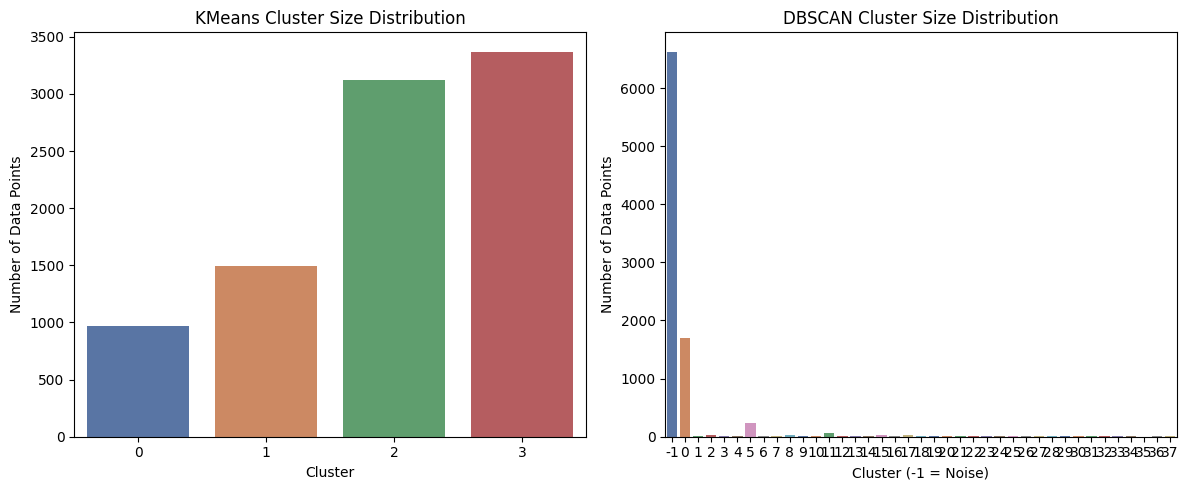

In [ ]:
# Create DataFrame for visualization
pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
pca_df['KMeans_Cluster'] = kmeans_labels
pca_df['DBSCAN_Cluster'] = dbscan_labels

# --- Visualization 1: Scatter Plot of Clusters in PCA Space ---
plt.figure(figsize=(14, 6))

# KMeans Scatter Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='KMeans_Cluster', palette='deep', data=pca_df, s=50)
plt.title('KMeans Clustering (4 Clusters)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} Variance)')
plt.legend(title='Cluster')

# DBSCAN Scatter Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='DBSCAN_Cluster', palette='deep', data=pca_df, s=50)
plt.title('DBSCAN Clustering')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} Variance)')
plt.legend(title='Cluster', loc='best')

plt.tight_layout()
plt.show()

# --- Visualization 2: Elbow Plot for KMeans ---
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters (KMeans)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

# --- Visualization 3: Silhouette Plot for KMeans ---
n_clusters = 4  # Adjust based on elbow plot or other criteria
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(df_scaled)

# Calculate silhouette scores
silhouette_avg = silhouette_score(df_scaled, cluster_labels)
sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

# Create silhouette plot
fig, ax = plt.subplots(figsize=(8, 6))
y_lower = 10

for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title(f'Silhouette Plot for KMeans (n_clusters={n_clusters})')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster Label')
ax.axvline(x=silhouette_avg, color='red', linestyle='--', label=f'Avg Silhouette Score: {silhouette_avg:.3f}')
ax.legend()
ax.set_yticks([])
ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

# --- Visualization 4: Cluster Size Distribution ---
plt.figure(figsize=(12, 5))

# KMeans Cluster Sizes
plt.subplot(1, 2, 1)
kmeans_counts = pd.Series(kmeans_labels).value_counts().sort_index()
sns.barplot(x=kmeans_counts.index, y=kmeans_counts.values, palette='deep')
plt.title('KMeans Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')

# DBSCAN Cluster Sizes
plt.subplot(1, 2, 2)
dbscan_counts = pd.Series(dbscan_labels).value_counts().sort_index()
sns.barplot(x=dbscan_counts.index, y=dbscan_counts.values, palette='deep')
plt.title('DBSCAN Cluster Size Distribution')
plt.xlabel('Cluster (-1 = Noise)')
plt.ylabel('Number of Data Points')

plt.tight_layout()
plt.show()

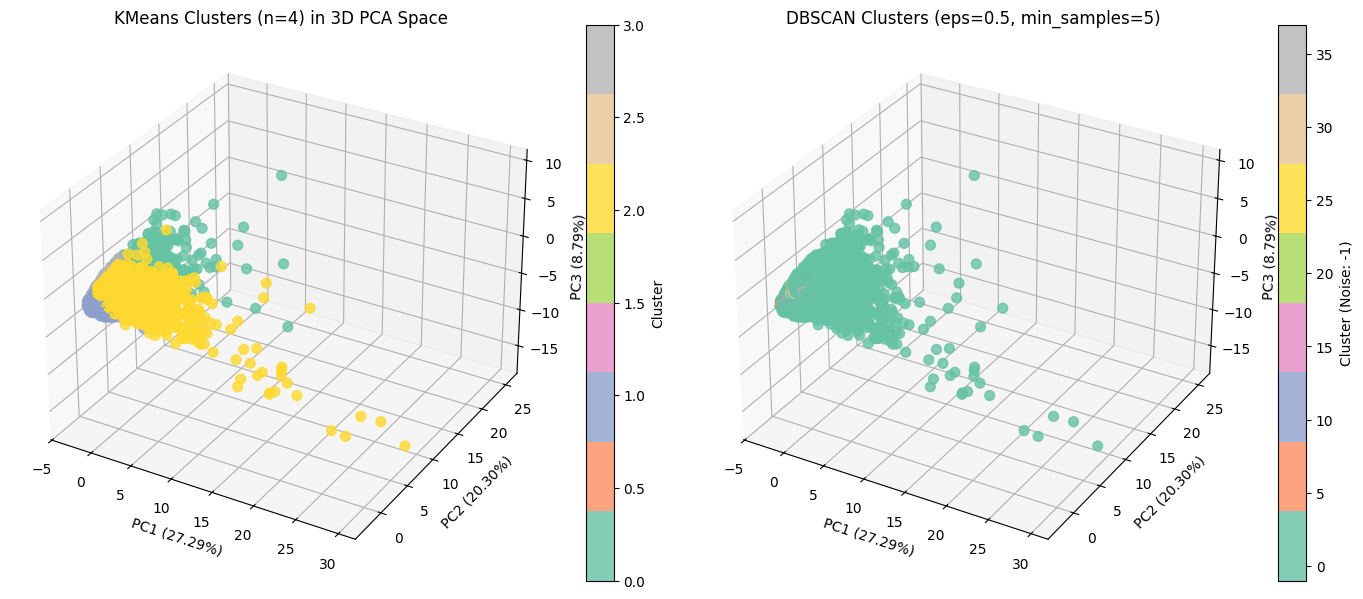

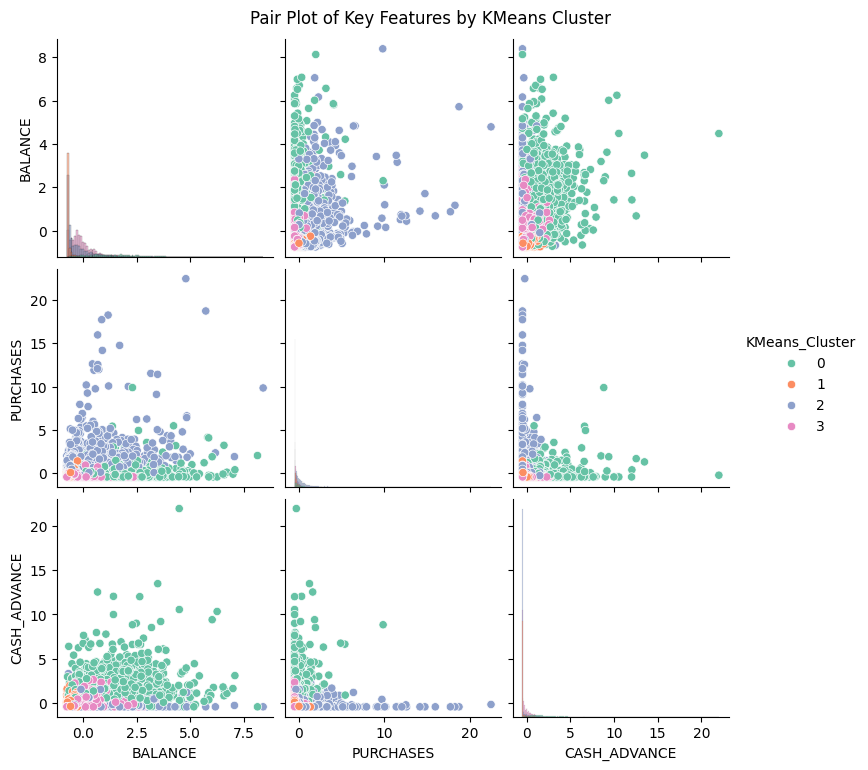

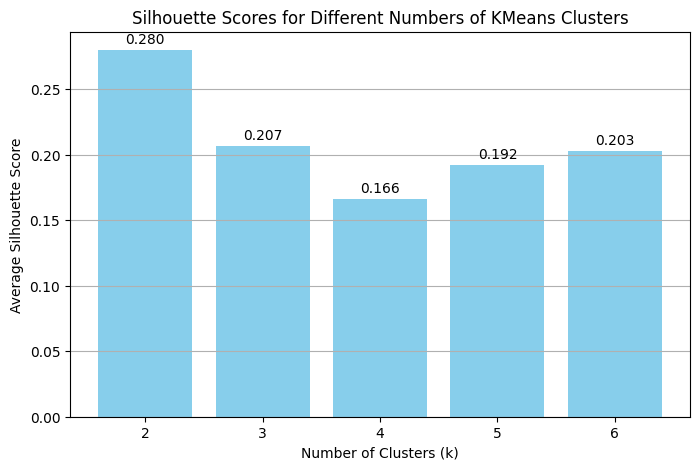

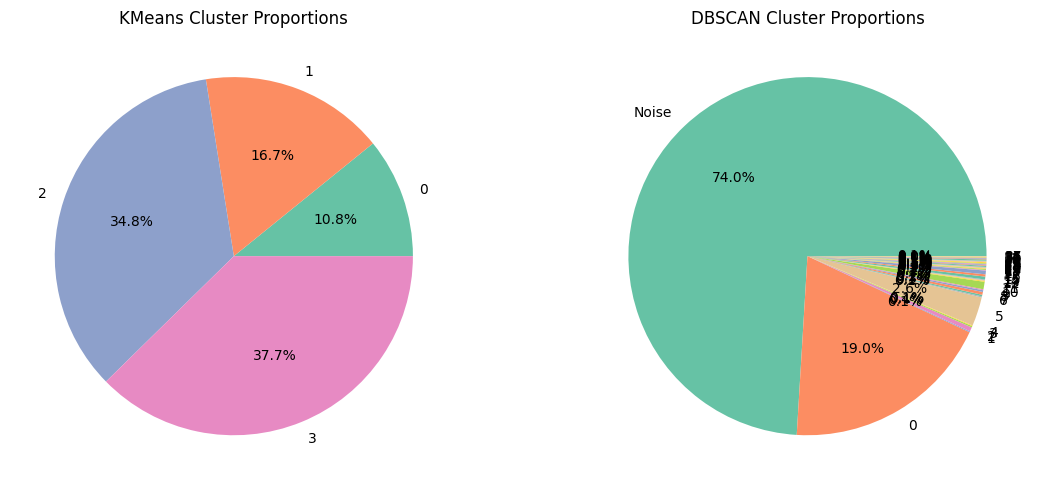

In [ ]:
# Apply PCA for 3D visualization
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)

# Apply KMeans (default: 4 clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

# Apply DBSCAN (adjust eps and min_samples as needed)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Create DataFrame for visualization
pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2', 'PC3'])
pca_df['KMeans_Cluster'] = kmeans_labels
pca_df['DBSCAN_Cluster'] = dbscan_labels

# --- Visualization 1: 3D Scatter Plot in PCA Space ---
fig = plt.figure(figsize=(14, 6))

# KMeans 3D Scatter Plot
ax1 = fig.add_subplot(121, projection='3d')
scatter1 = ax1.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['KMeans_Cluster'], cmap='Set2', s=50, alpha=0.8)
ax1.set_title('KMeans Clusters (n=4) in 3D PCA Space')
ax1.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
ax1.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
ax1.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%})')
fig.colorbar(scatter1, ax=ax1, label='Cluster')

# DBSCAN 3D Scatter Plot
ax2 = fig.add_subplot(122, projection='3d')
scatter2 = ax2.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['DBSCAN_Cluster'], cmap='Set2', s=50, alpha=0.8)
ax2.set_title('DBSCAN Clusters (eps=0.5, min_samples=5)')
ax2.set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
ax2.set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
ax2.set_zlabel(f'PC3 ({pca.explained_variance_ratio_[2]:.2%})')
fig.colorbar(scatter2, ax=ax2, label='Cluster (Noise: -1)')

plt.tight_layout()
plt.show()

# --- Visualization 2: Pair Plot of Key Features by Cluster ---
# Select key features for visualization
key_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE']
features_df = df_imputed[key_features].copy()
features_df['KMeans_Cluster'] = kmeans_labels

# Create pair plot
sns.pairplot(features_df, hue='KMeans_Cluster', palette='Set2', diag_kind='hist', vars=key_features)
plt.suptitle('Pair Plot of Key Features by KMeans Cluster', y=1.02)
plt.show()

# --- Visualization 3: Silhouette Score Comparison for KMeans ---
silhouette_scores = []
k_range = range(2, 7)  # Test 2 to 6 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.bar(k_range, silhouette_scores, color='skyblue')
plt.title('Silhouette Scores for Different Numbers of KMeans Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_range)
plt.grid(True, axis='y')
for i, score in enumerate(silhouette_scores):
    plt.text(k_range[i], score + 0.005, f'{score:.3f}', ha='center')
plt.show()

# --- Visualization 4: Pie Chart for Cluster Proportions ---
plt.figure(figsize=(12, 5))

# KMeans Pie Chart
plt.subplot(1, 2, 1)
kmeans_counts = pd.Series(kmeans_labels).value_counts().sort_index()
plt.pie(kmeans_counts, labels=kmeans_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(kmeans_counts)))
plt.title('KMeans Cluster Proportions')

# DBSCAN Pie Chart
plt.subplot(1, 2, 2)
dbscan_counts = pd.Series(dbscan_labels).value_counts().sort_index()
labels = [str(x) if x != -1 else 'Noise' for x in dbscan_counts.index]
plt.pie(dbscan_counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(dbscan_counts)))
plt.title('DBSCAN Cluster Proportions')

plt.tight_layout()
plt.show()

In [ ]:
fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color='KMeans_Cluster', title='KMeans Clusters in 3D PCA Space')
fig.show()

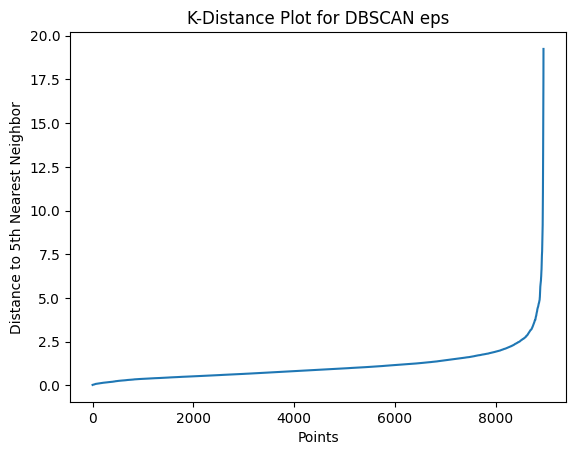

In [ ]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distances, _ = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.title('K-Distance Plot for DBSCAN eps')
plt.xlabel('Points')
plt.ylabel('Distance to 5th Nearest Neighbor')
plt.show()

# streamlit **BONUS**:😎

In [ ]:
!pip install streamlit

In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
import tempfile
import os


# Load the data
@st.cache_data
def load_data():
    df = pd.read_csv('CC GENERAL.csv')
    df = df.drop('CUST_ID', axis=1)
    return df

# Preprocess the data
@st.cache_data
def preprocess_data(df):
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_imputed)

    pca_2d = PCA(n_components=2)
    df_pca_2d = pca_2d.fit_transform(df_scaled)

    pca_3d = PCA(n_components=3)
    df_pca_3d = pca_3d.fit_transform(df_scaled)

    return df_imputed, df_scaled, df_pca_2d, df_pca_3d, pca_2d, pca_3d

# Set up the page
st.set_page_config(page_title="Credit Card Data Analysis", layout="wide")
st.title("Credit Card Data Analysis 🧠")

# Load and preprocess the data
df = load_data()
df_imputed, df_scaled, df_pca_2d, df_pca_3d, pca_2d, pca_3d = preprocess_data(df)

# Sidebar for navigation
st.sidebar.header("Navigation")
page = st.sidebar.selectbox("Select Section", ["Exploratory Data Analysis", "K-Means Clustering", "DBSCAN Clustering", "Additional Visualizations"])

# Exploratory Data Analysis (EDA) Section
if page == "Exploratory Data Analysis":
    st.header("Exploratory Data Analysis (EDA)")

    # Data statistics
    st.subheader("Data Summary")
    st.write(df.describe())

    # Missing values
    st.subheader("Missing Values")
    st.write(df.isna().sum())

    # Missing values heatmap
    st.subheader("Missing Values Heatmap")
    missing_cols = df.columns[df.isna().any()]
    if len(missing_cols) > 0:
        fig, ax = plt.subplots(figsize=(12, 5))
        sns.heatmap(df[missing_cols].isna(), cbar=False, cmap='viridis', ax=ax)
        plt.title('Missing Values Heatmap (Filtered Columns)')

        with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmpfile:
            plt.savefig(tmpfile.name)
            st.image(tmpfile.name)
        os.unlink(tmpfile.name)
        plt.close()
    else:
        st.write("No missing values found.")

    # Distribution of important variables
    st.subheader("Distribution of Important Variables")
    important_cols = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS']
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    for i, col in enumerate(important_cols):
        sns.histplot(df[col], kde=True, color='skyblue', ax=axes[i//2, i%2])
        axes[i//2, i%2].set_title(f'Distribution of {col}')
    plt.tight_layout()

    with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmpfile:
        plt.savefig(tmpfile.name)
        st.image(tmpfile.name)
    os.unlink(tmpfile.name)
    plt.close()

    # Correlation matrix
    st.subheader("Correlation Matrix")
    fig, ax = plt.subplots(figsize=(14, 10))
    corr_matrix = df.corr()
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5, ax=ax)
    plt.title("Correlation Heatmap")

    with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmpfile:
        plt.savefig(tmpfile.name)
        st.image(tmpfile.name)
    os.unlink(tmpfile.name)
    plt.close()

    # Pair plot
    st.subheader("Pair Plot of Important Variables")
    pair_plot = sns.pairplot(df[important_cols], corner=True)

    with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmpfile:
        pair_plot.savefig(tmpfile.name)
        st.image(tmpfile.name)
    os.unlink(tmpfile.name)
    plt.close()

# K-Means Clustering Section
elif page == "K-Means Clustering":
    st.header("K-Means Clustering")

    # Select number of clusters
    n_clusters = st.slider("Select Number of Clusters", min_value=2, max_value=10, value=4)

    # Train the model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(df_scaled)

    # 2D PCA Scatter Plot
    st.subheader("K-Means Clustering in 2D PCA Space")
    pca_df_2d = pd.DataFrame(data=df_pca_2d, columns=['PC1', 'PC2'])
    pca_df_2d['Cluster'] = kmeans_labels
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='deep', data=pca_df_2d, s=50, ax=ax)
    plt.title(f'KMeans with {n_clusters} Clusters')
    plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} Variance)')
    plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} Variance)')

    with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmpfile:
        plt.savefig(tmpfile.name)
        st.image(tmpfile.name)
    os.unlink(tmpfile.name)
    plt.close()

    # 3D PCA Scatter Plot
    st.subheader("K-Means Clustering in 3D PCA Space")
    pca_df_3d = pd.DataFrame(data=df_pca_3d, columns=['PC1', 'PC2', 'PC3'])
    pca_df_3d['Cluster'] = kmeans_labels
    fig = px.scatter_3d(pca_df_3d, x='PC1', y='PC2', z='PC3', color='Cluster', title='KMeans Clusters in 3D PCA Space')
    st.plotly_chart(fig)

    # Elbow Plot
    st.subheader("Elbow Plot")
    inertia = []
    k_range = range(1, 11)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(df_scaled)
        inertia.append(kmeans.inertia_)

    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(k_range, inertia, marker='o', linestyle='--')
    plt.title('Elbow Plot for Determining Number of Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True)

    with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmpfile:
        plt.savefig(tmpfile.name)
        st.image(tmpfile.name)
    os.unlink(tmpfile.name)
    plt.close()

    # Silhouette Plot
    st.subheader("Silhouette Plot")
    cluster_labels = kmeans_labels
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    sample_silhouette_values = silhouette_samples(df_scaled, cluster_labels)

    fig, ax = plt.subplots(figsize=(8, 6))
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax.set_title(f'Silhouette Plot for KMeans (n_clusters={n_clusters})')
    ax.set_xlabel('Silhouette Coefficient')
    ax.set_ylabel('Cluster Label')
    ax.axvline(x=silhouette_avg, color='red', linestyle='--', label=f'Avg Silhouette Score: {silhouette_avg:.3f}')
    ax.legend()
    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmpfile:
        plt.savefig(tmpfile.name)
        st.image(tmpfile.name)
    os.unlink(tmpfile.name)
    plt.close()

# DBSCAN Clustering Section
elif page == "DBSCAN Clustering":
    st.header("DBSCAN Clustering")

    # Select DBSCAN parameters
    eps = st.slider("Select eps value", min_value=0.1, max_value=2.0, value=0.5, step=0.1)
    min_samples = st.slider("Select min_samples value", min_value=3, max_value=20, value=5)

    # Train the model
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(df_scaled)

    # 2D PCA Scatter Plot
    st.subheader("DBSCAN Clustering in 2D PCA Space")
    pca_df_2d = pd.DataFrame(data=df_pca_2d, columns=['PC1', 'PC2'])
    pca_df_2d['Cluster'] = dbscan_labels
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='deep', data=pca_df_2d, s=50, ax=ax)
    plt.title(f'DBSCAN (eps={eps}, min_samples={min_samples})')
    plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} Variance)')
    plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} Variance)')

    with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmpfile:
        plt.savefig(tmpfile.name)
        st.image(tmpfile.name)
    os.unlink(tmpfile.name)
    plt.close()

    # 3D PCA Scatter Plot
    st.subheader("DBSCAN Clustering in 3D PCA Space")
    pca_df_3d = pd.DataFrame(data=df_pca_3d, columns=['PC1', 'PC2', 'PC3'])
    pca_df_3d['Cluster'] = dbscan_labels
    fig = px.scatter_3d(pca_df_3d, x='PC1', y='PC2', z='PC3', color='Cluster', title='DBSCAN Clusters in 3D PCA Space')
    st.plotly_chart(fig)

    # Number of clusters and noise points
    n_clusters = len(np.unique(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)
    st.write(f"Number of clusters: {n_clusters}")
    st.write(f"Number of noise points: {n_noise}")

# Additional Visualizations Section
elif page == "Additional Visualizations":
    st.header("Additional Visualizations")

    # Cluster Size Distribution
    st.subheader("Cluster Size Distribution")
    kmeans = KMeans(n_clusters=4, random_state=42)
    kmeans_labels = kmeans.fit_predict(df_scaled)
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(df_scaled)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    kmeans_counts = pd.Series(kmeans_labels).value_counts().sort_index()
    sns.barplot(x=kmeans_counts.index, y=kmeans_counts.values, palette='deep', ax=ax1)
    ax1.set_title('KMeans Cluster Size Distribution')
    ax1.set_xlabel('Cluster')
    ax1.set_ylabel('Number of Data Points')

    dbscan_counts = pd.Series(dbscan_labels).value_counts().sort_index()
    sns.barplot(x=dbscan_counts.index, y=dbscan_counts.values, palette='deep', ax=ax2)
    ax2.set_title('DBSCAN Cluster Size Distribution')
    ax2.set_xlabel('Cluster (-1 = Noise)')
    ax2.set_ylabel('Number of Data Points')

    plt.tight_layout()

    with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmpfile:
        plt.savefig(tmpfile.name)
        st.image(tmpfile.name)
    os.unlink(tmpfile.name)
    plt.close()

    # Pair Plot of Key Features
    st.subheader("Pair Plot of Key Features by KMeans Cluster")
    key_features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE']
    features_df = df_imputed[key_features].copy()
    features_df['KMeans_Cluster'] = kmeans_labels
    pair_plot = sns.pairplot(features_df, hue='KMeans_Cluster', palette='Set2', diag_kind='hist', vars=key_features)
    plt.suptitle('Pair Plot of Key Features by KMeans Cluster', y=1.02)

    with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmpfile:
        pair_plot.savefig(tmpfile.name)
        st.image(tmpfile.name)
    os.unlink(tmpfile.name)
    plt.close()

    # Silhouette Score Comparison
    st.subheader("Silhouette Score Comparison for KMeans")
    silhouette_scores = []
    k_range = range(2, 7)
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(df_scaled)
        score = silhouette_score(df_scaled, labels)
        silhouette_scores.append(score)

    fig, ax = plt.subplots(figsize=(8, 5))
    plt.bar(k_range, silhouette_scores, color='skyblue')
    plt.title('Silhouette Scores for Different Numbers of KMeans Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average Silhouette Score')
    plt.xticks(k_range)
    plt.grid(True, axis='y')
    for i, score in enumerate(silhouette_scores):
        plt.text(k_range[i], score + 0.005, f'{score:.3f}', ha='center')

    with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmpfile:
        plt.savefig(tmpfile.name)
        st.image(tmpfile.name)
    os.unlink(tmpfile.name)
    plt.close()

    # Cluster Proportions Pie Chart
    st.subheader("Cluster Proportions")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    kmeans_counts = pd.Series(kmeans_labels).value_counts().sort_index()
    ax1.pie(kmeans_counts, labels=kmeans_counts.index, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(kmeans_counts)))
    ax1.set_title('KMeans Cluster Proportions')

    dbscan_counts = pd.Series(dbscan_labels).value_counts().sort_index()
    labels = [str(x) if x != -1 else 'Noise' for x in dbscan_counts.index]
    ax2.pie(dbscan_counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('Set2', len(dbscan_counts)))
    ax2.set_title('DBSCAN Cluster Proportions')

    plt.tight_layout()

    with tempfile.NamedTemporaryFile(delete=False, suffix='.png') as tmpfile:
        plt.savefig(tmpfile.name)
        st.image(tmpfile.name)
    os.unlink(tmpfile.name)
    plt.close()

Writing app.py


In [ ]:
!pkill ngrok

In [ ]:
from pyngrok import ngrok
!ngrok authtoken 2x04BpGUGQpYc7Dnj19kqmwsobc_2YwDVbbq3nMKfynuDjBwP
!streamlit run app.py &>/content/logs.txt &
public_url = ngrok.connect(8501)
print(public_url)

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
NgrokTunnel: "https://fc6a-35-202-194-199.ngrok-free.app" -> "http://localhost:8501"
